In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
# from google.colab import drive
# drive.mount('/content/drive')

# url = 'https://drive.google.com/uc?id={}'.format("1EpS1_XS3DkcLl-RG18Ooon4Vetyymdq_")
# df = pd.read_csv(url)
df = pd.read_csv('..\diabetes.csv')

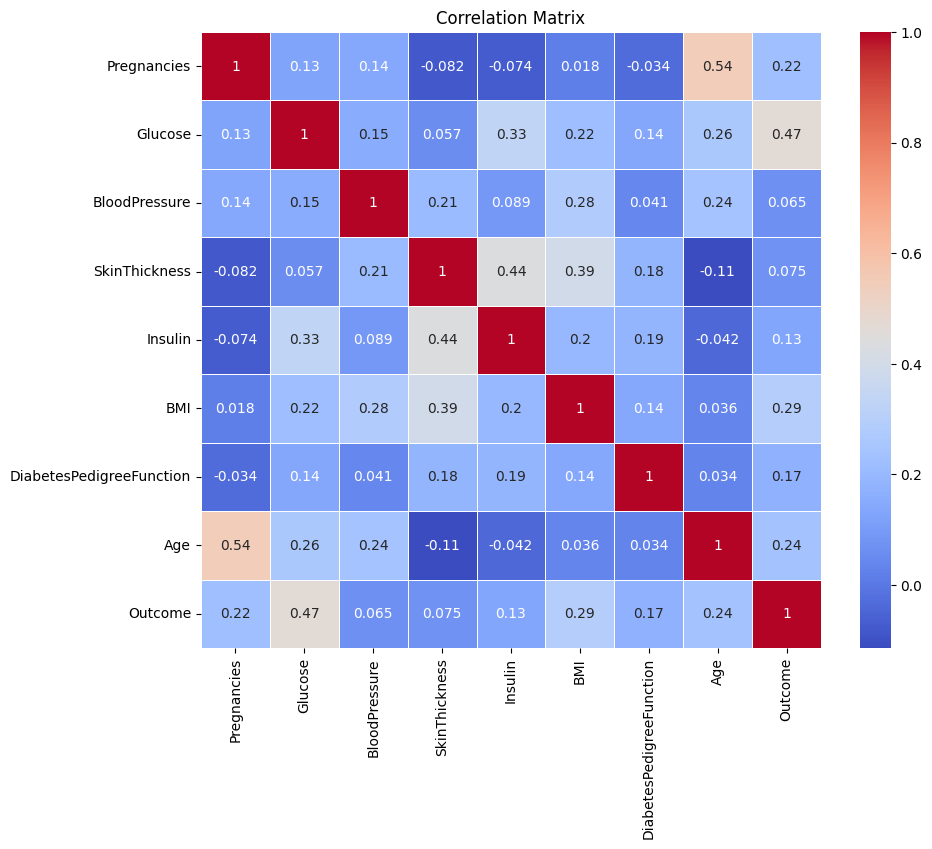

In [ ]:
correlation_matrix = df.corr()
#Creating a Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

0    500
1    268
Name: Outcome, dtype: int64


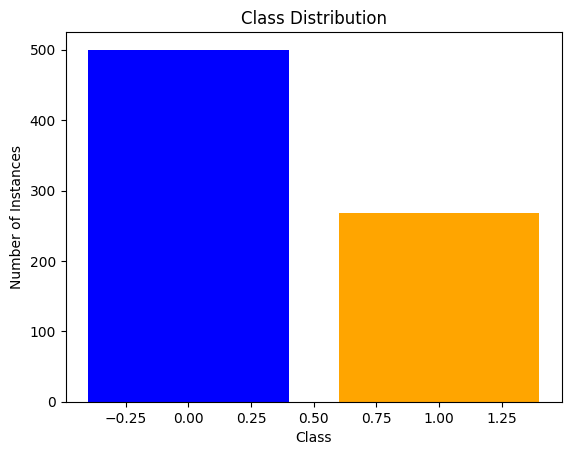

In [ ]:
# Count the number of instances in each class
class_counts = df['Outcome'].value_counts()
print(class_counts)
# Plot the distribution
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.show()

In [ ]:
def balance_dataframe_undersample(df, target_column):
    # Separate features and target variable
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Apply undersampling
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)

    # Create a new balanced DataFrame
    balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

    return balanced_df

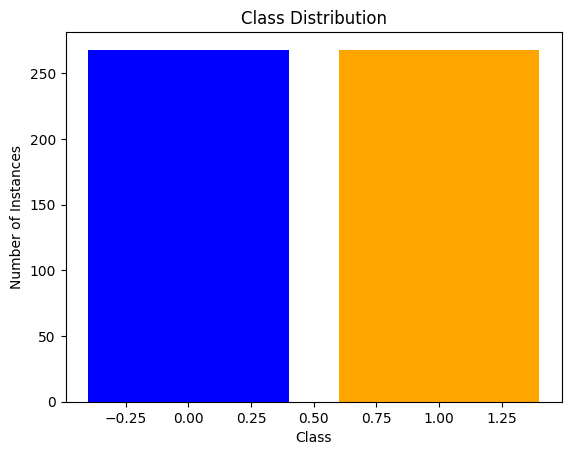

In [ ]:
b_df = balance_dataframe_undersample(df, 'Outcome')
cc = b_df['Outcome'].value_counts()
# print(class_counts)
# Plot the distribution
plt.bar(cc.index, cc.values, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.show()

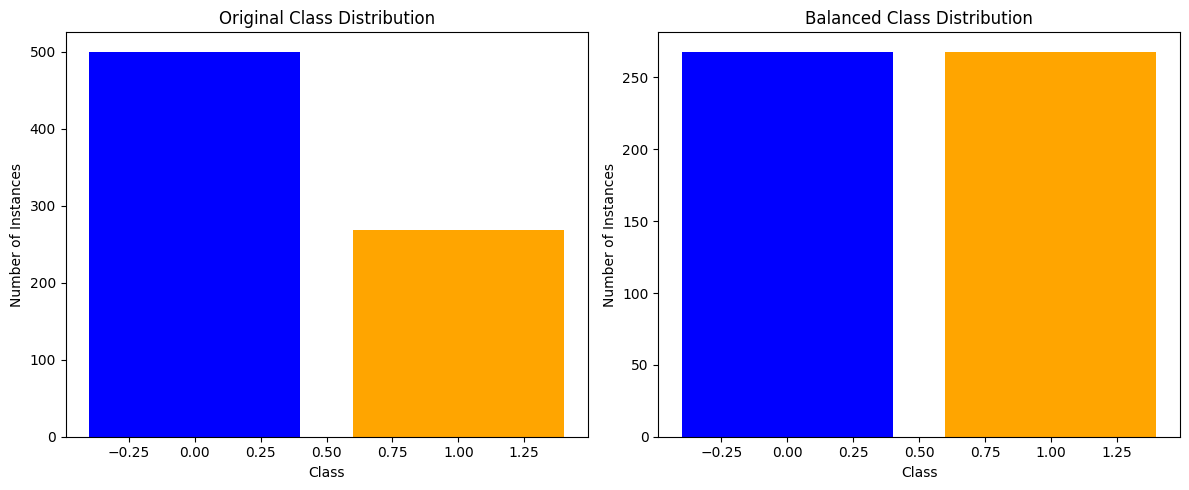

In [ ]:
# Plotting both bar charts in a single row
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot the first bar chart
axs[0].bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Number of Instances')
axs[0].set_title('Original Class Distribution')

# Plot the second bar chart
axs[1].bar(cc.index, cc.values, color=['blue', 'orange'])
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Number of Instances')
axs[1].set_title('Balanced Class Distribution')

plt.tight_layout()  # Ensures that the plots do not overlap
plt.show()

In [ ]:
x = b_df.drop(['Outcome'], axis=1)
y = b_df['Outcome']

In [ ]:
mse_history = []

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import StandardScaler

# # Load the dataset

# diabetes_data = pd.read_csv(url)

# # Select relevant features
# selected_features = ['Glucose', 'BMI', 'Age']
# X = diabetes_data[selected_features]
# y = diabetes_data['Outcome']  # Assuming 'Outcome' is the target variable

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the features (important for neural networks)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Create and train the MLP model
# mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
# mlp_model.fit(X_train_scaled, y_train)

# # Make predictions on the test set
# y_pred = mlp_model.predict(X_test_scaled)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [ ]:
class NeuralNetwork:

    def __init__(self, num_inputs, num_hidden, num_outputs):
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs

        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(self.num_inputs, self.num_hidden)
        self.bias_hidden = np.zeros((1, self.num_hidden))
        self.weights_hidden_output = np.random.rand(self.num_hidden, self.num_outputs)
        self.bias_output = np.zeros((1, self.num_outputs))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, input_data):
        # Input to hidden layer
        self.hidden_input = np.dot(input_data, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        # Hidden to output layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) +self.bias_output
        self.final_output = self.sigmoid(self.output_input)
        return self.final_output

    def backward(self, input_data, target, learning_rate):
        # Calculate output layer error
        output_error = target - self.final_output
        output_delta = output_error * self.final_output * (1 - self.final_output)

        # Calculate hidden layer error
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.hidden_output * (1 - self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * learning_rate
        self.weights_input_hidden += np.dot(input_data.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0) * learning_rate

    def train(self, input_data, target, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward pass
            self.forward(input_data)

            # Backward pass
            self.backward(input_data, target, learning_rate)

            # Calculate and print mean squared error for monitoring
            mse = np.mean(np.square(target - self.final_output))
            mse_history.append(mse)
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Mean Squared Error: {mse}")


In [ ]:
# Function to plot decision boundaries
def plot_decision_boundary(X, y, model):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # xx, yy = np.meshgrid(np.arange(x_min-0.5, x_max+0.5, h), np.arange(y_min-0.5, y_max+0.5, h))
    Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='black', alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.viridis, edgecolors='black', marker='o')
    plt.xlim([-1.0, 2.0])
    plt.ylim([-1.0, 2.0])

Epoch 0, Mean Squared Error: 0.28787277770247116
Epoch 1000, Mean Squared Error: 0.24997617039983583
Epoch 2000, Mean Squared Error: 0.24982098642409695
Epoch 3000, Mean Squared Error: 0.249483519751234
Epoch 4000, Mean Squared Error: 0.24818791573692195
Epoch 5000, Mean Squared Error: 0.24043352134308418
Epoch 6000, Mean Squared Error: 0.20625495124678353
Epoch 7000, Mean Squared Error: 0.1289814596796708
Epoch 8000, Mean Squared Error: 0.03232480475776032
Epoch 9000, Mean Squared Error: 0.01294581584823892
Epoch 10000, Mean Squared Error: 0.007495661797752094


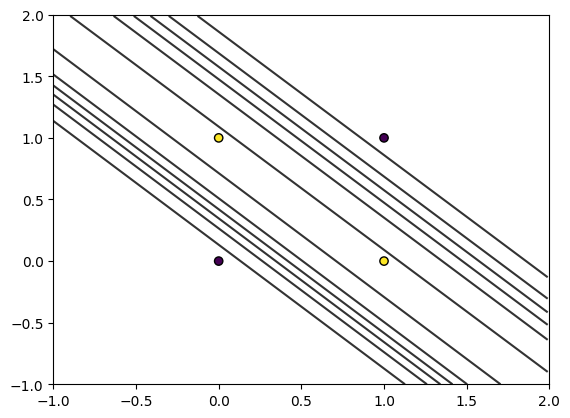

In [ ]:
# Example usage with XOR problem
input_size = 2
hidden_size = 3
output_size = 1

# XOR input data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# XOR target data
y_xor = np.array([[0], [1], [1], [0]])

# Create and train the neural network
nn = NeuralNetwork(input_size, hidden_size, output_size)
nn.train(X_xor, y_xor, epochs=10001, learning_rate=0.1)
plot_decision_boundary(X_xor, y_xor, nn)

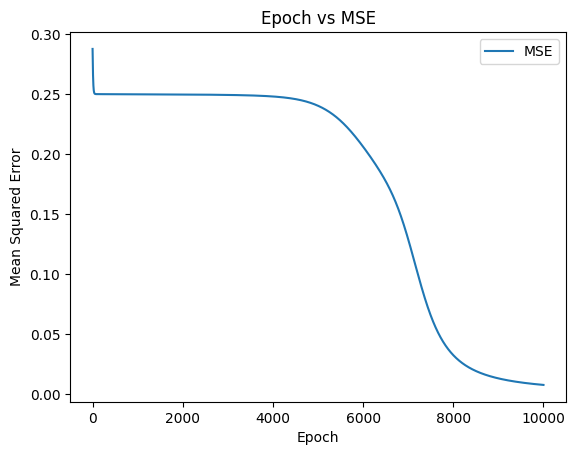

In [ ]:
plt.plot(range(len(mse_history)), mse_history, label='MSE')
plt.title('Epoch vs MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [ ]:
predictions = nn.forward(X_xor)
print(predictions>0.5)

[[False]
 [ True]
 [ True]
 [False]]


In [ ]:
selected_feature = ['Glucose','BMI','Age']
x_db= x[selected_feature]
# x_db = x
print(x_db)

     Glucose   BMI  Age
0         97  38.1   30
1         78  33.7   25
2        111  29.5   22
3        129  28.0   27
4        102  37.2   45
..       ...   ...  ...
531      128  36.5   37
532      123  36.3   52
533      190  35.5   66
534      170  44.0   43
535      126  30.1   47

[536 rows x 3 columns]


In [ ]:
def normalize_data(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    normalized_data = (data - mean) / std
    return normalized_data

In [ ]:
x_db = x_db.to_numpy()
y = y.to_numpy()

In [ ]:
y = y.reshape(-1,1)

In [ ]:
x_dbn = normalize_data(x_db)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_dbn, y, test_size=0.20, random_state=0)

In [ ]:
input_size = 3  # Number of features
hidden_size = 50  # Number of nodes in the hidden layer (you can adjust this)
output_size = 1  # Number of classes

mse_history = []
# Create MLP
mlp = NeuralNetwork(input_size, hidden_size, output_size)

mlp.train(x_train,y_train,epochs = 50001 , learning_rate = 0.01)
prediction2 = mlp.forward(x_test)

Epoch 0, Mean Squared Error: 0.5024103643508414
Epoch 1000, Mean Squared Error: 0.1534037745279097
Epoch 2000, Mean Squared Error: 0.14713678326079446
Epoch 3000, Mean Squared Error: 0.13844686418416882
Epoch 4000, Mean Squared Error: 0.1323695000254855
Epoch 5000, Mean Squared Error: 0.12778783483875877
Epoch 6000, Mean Squared Error: 0.12299716659914735
Epoch 7000, Mean Squared Error: 0.11930481914502276
Epoch 8000, Mean Squared Error: 0.11671253302475554
Epoch 9000, Mean Squared Error: 0.1143694679442076
Epoch 10000, Mean Squared Error: 0.11189814710006926
Epoch 11000, Mean Squared Error: 0.1094660078997994
Epoch 12000, Mean Squared Error: 0.10703444531367615
Epoch 13000, Mean Squared Error: 0.10456395649405413
Epoch 14000, Mean Squared Error: 0.10183598328962475
Epoch 15000, Mean Squared Error: 0.09888858117903662
Epoch 16000, Mean Squared Error: 0.09617093378417199
Epoch 17000, Mean Squared Error: 0.09345787918241992
Epoch 18000, Mean Squared Error: 0.09095772625107998
Epoch 19000

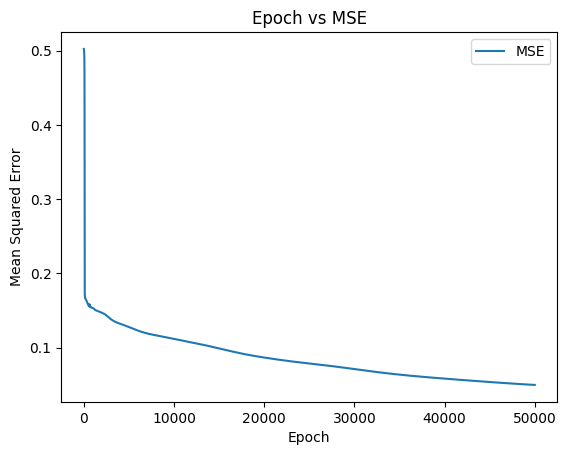

In [ ]:
plt.plot(range(len(mse_history)), mse_history, label='MSE')
plt.title('Epoch vs MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [ ]:
prediction3 = np.zeros_like(prediction2)
prediction3[prediction2[:,0]>0.5]=1

In [ ]:
accuracy = np.sum(prediction3 == y_test)/ len(y_test)
accuracy

0.6944444444444444